# Data analysis exercise using seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import data
brain_data = pd.read_csv('brain_size.csv', sep = ';', index_col=0, na_values='.')

In [3]:
brain_data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [4]:
brain_data.dtypes

Gender        object
FSIQ           int64
VIQ            int64
PIQ            int64
Weight       float64
Height       float64
MRI_Count      int64
dtype: object

In [5]:
#Data imputation:
brain_data.isnull().sum()

Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       2
Height       1
MRI_Count    0
dtype: int64

In [6]:
brain_data[brain_data['Height'].isnull()]

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
21,Male,83,83,86,NaN,NaN,892420


In [7]:
brain_data[brain_data['Weight'].isnull()]

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
2,Male,140,150,124,NaN,72.5,1001121
21,Male,83,83,86,NaN,NaN,892420


In [8]:
brain_data.loc[((brain_data['Gender'] == 'Male') & brain_data['Weight'].isnull()), 'Weight'] = brain_data[brain_data['Gender'] == 'Male'].Weight.mean()

In [9]:
brain_data.loc[((brain_data['Gender'] == 'Male') & brain_data['Height'].isnull()), 'Height'] = brain_data[brain_data['Gender'] == 'Male'].Height.mean()

In [10]:
brain_data.isnull().sum()

Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       0
Height       0
MRI_Count    0
dtype: int64

In [11]:
brain_data.groupby('Gender').describe()

FSIQ                                                        VIQ  \
       count   mean        std   min    25%    50%     75%    max count   
Gender                                                                    
Female  20.0  111.9  23.686327  77.0  90.25  115.5  133.00  140.0  20.0   
Male    20.0  115.0  24.986312  80.0  89.75  118.0  139.25  144.0  20.0   

                ...  Height       MRI_Count                                   \
          mean  ...     75%   max     count      mean          std       min   
Gender          ...                                                            
Female  109.45  ...  66.875  70.5      20.0  862654.6  55893.55578  790619.0   
Male    115.25  ...  73.625  77.0      20.0  954855.4  55911.35471  879987.0   

                                                  
              25%       50%       75%        max  
Gender                                            
Female  828062.00  855365.0  882668.5   991305.0  
Male    919529.25  947241.5  973496.0  1079549.0  

[2 rows x 48 columns]

In [12]:
import seaborn as sns
sns.set(style="white", color_codes=True)

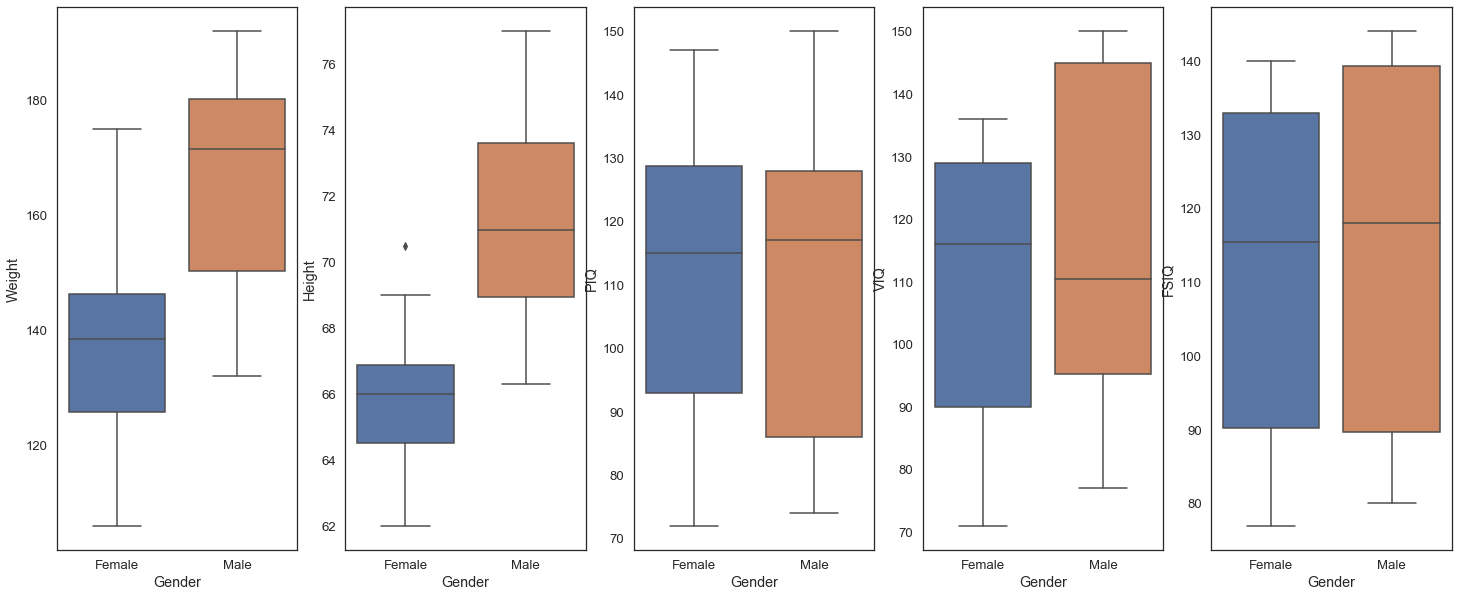

In [13]:
with sns.plotting_context("notebook", font_scale=1.2):
    fig, ax = plt.subplots(1,5, figsize=(25,10))
    columns = ['Weight', 'Height', 'PIQ', 'VIQ', 'FSIQ']
    for i, col in enumerate(columns):
        sns.boxplot(x = 'Gender', y = col, data = brain_data, ax = ax[i])

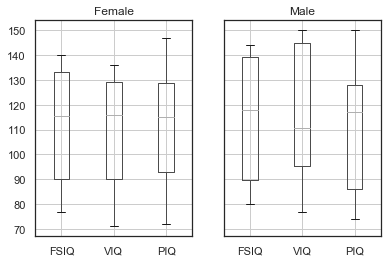

In [14]:
brain_data.groupby('Gender').boxplot(column=['FSIQ', 'VIQ', 'PIQ'])
plt.show()

/Users/carlosjarguello/miniconda3/envs/DS/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/carlosjarguello/miniconda3/envs/DS/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


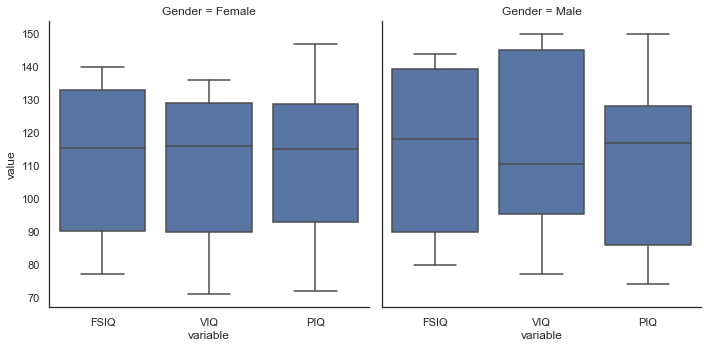

In [15]:
g = sns.FacetGrid(pd.melt(brain_data[['FSIQ', 'VIQ', 'PIQ','Gender']], id_vars='Gender'), col='Gender', size=5)
g.map(sns.boxplot, 'variable', 'value')
plt.show()

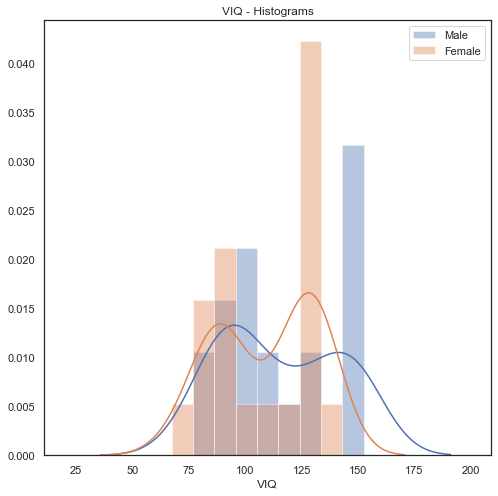

In [16]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
sns.distplot(brain_data.loc[brain_data['Gender'] == 'Male', 'VIQ'], bins=np.linspace(20,200,20), label="Male")
sns.distplot(brain_data.loc[brain_data['Gender'] == 'Female', 'VIQ'], bins=np.linspace(20,200,20), label="Female")
plt.legend()
plt.title("VIQ - Histograms")
plt.show()

/Users/carlosjarguello/miniconda3/envs/DS/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


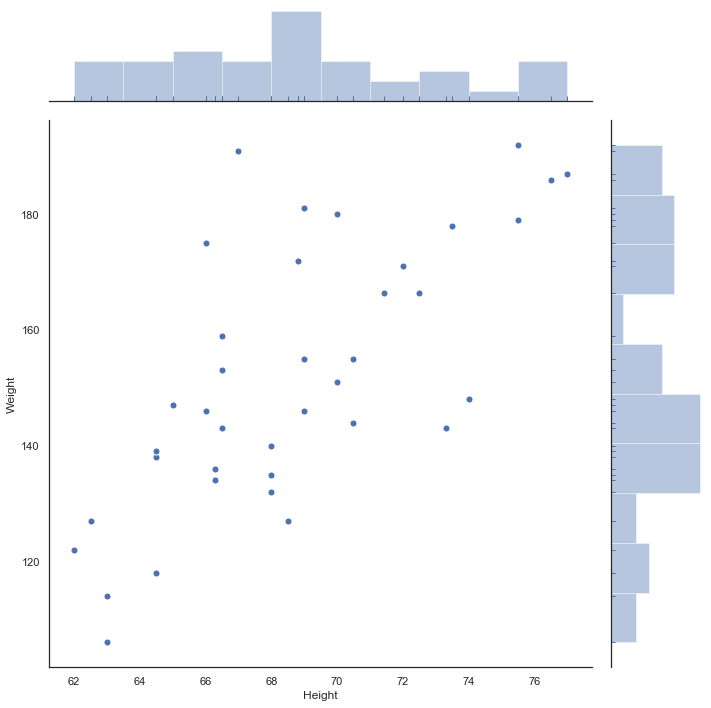

In [17]:
sns.jointplot(x="Height", y="Weight", data=brain_data, size = 10, 
              marginal_kws=dict(bins=10, rug=True),
                   s=50, edgecolor="w", linewidth=1)
plt.show()

/Users/carlosjarguello/miniconda3/envs/DS/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


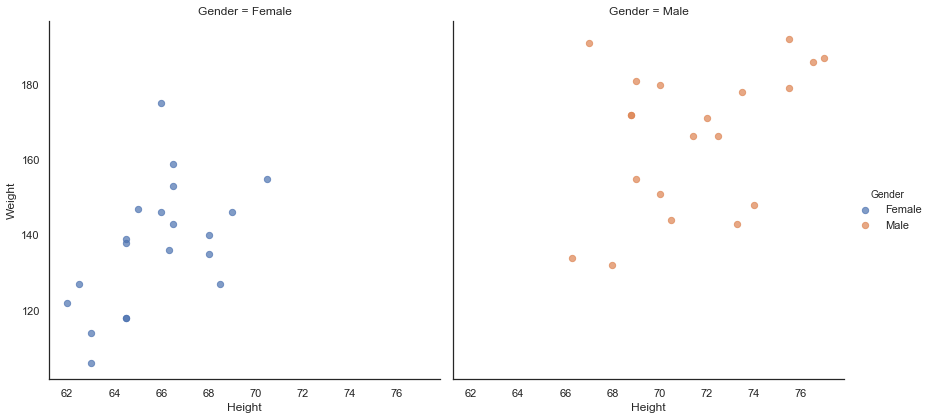

In [18]:
g = sns.FacetGrid(brain_data, col="Gender", hue="Gender", size = 6)
g.map(plt.scatter, "Height", "Weight", alpha=.7, s = 40)
g.add_legend();

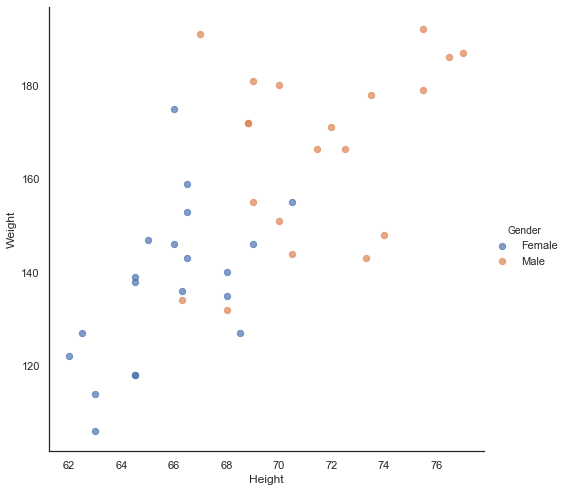

In [19]:
g = sns.FacetGrid(brain_data, hue="Gender", size = 7)
g.map(plt.scatter, "Height", "Weight", alpha=.7, s = 40)
g.add_legend();

/Users/carlosjarguello/miniconda3/envs/DS/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


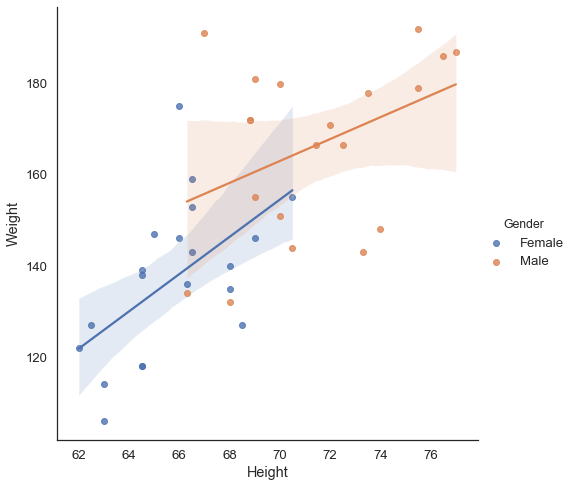

In [20]:
#fig, ax = plt.subplots(1,1, figsize = (10,10))
with sns.plotting_context("notebook", font_scale=1.2):
    sns.lmplot(x= 'Height', y = 'Weight', hue = 'Gender', data = brain_data, size=7)
plt.show()

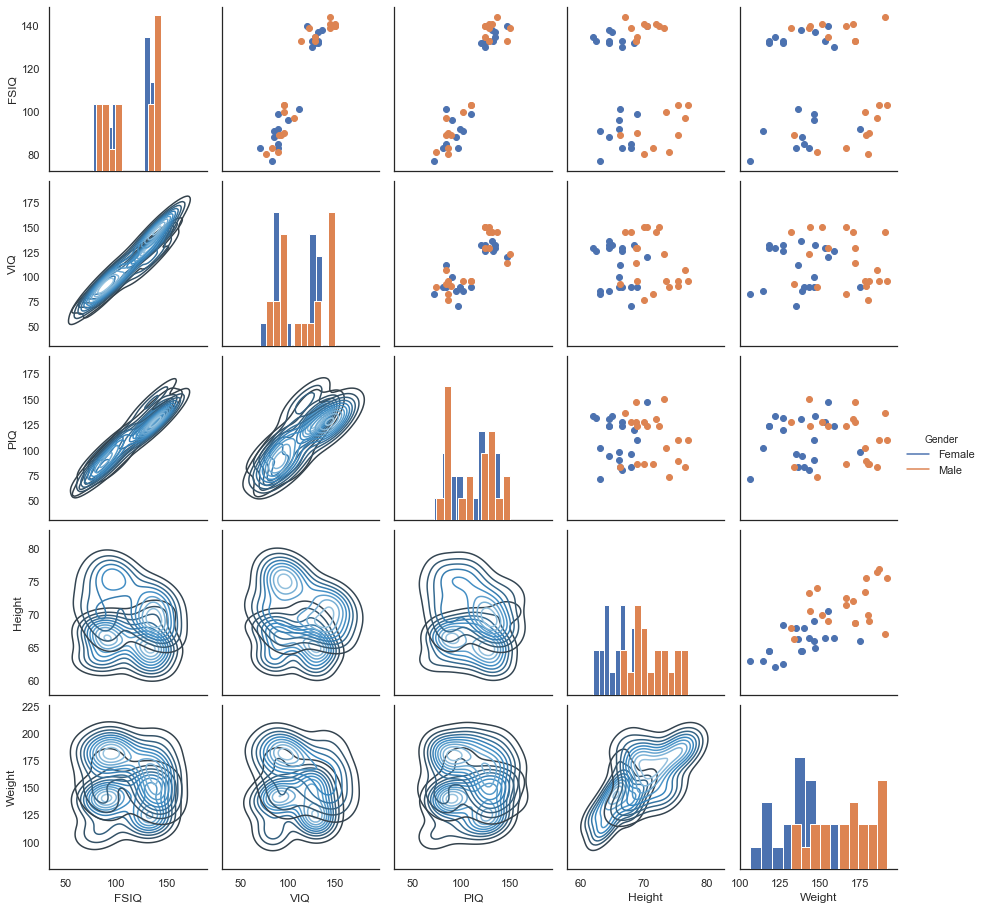

In [21]:
g = sns.PairGrid(brain_data, vars= ['FSIQ','VIQ','PIQ', 'Height', 'Weight'], hue='Gender')
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
#g.map_diag(sns.kdeplot, lw=3, legend=False);
g.add_legend();

In [24]:
import statsmodels.formula.api as smf

In [27]:
model = smf.ols('Weight ~ Height + 1', brain_data[brain_data['Gender'] == 'Male']).fit()

In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     3.538
Date:                Tue, 28 Apr 2020   Prob (F-statistic):             0.0763
Time:                        21:53:46   Log-Likelihood:                -84.922
No. Observations:                  20   AIC:                             173.8
Df Residuals:                      18   BIC:                             175.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3491     91.426     -0.059      0.9

In [29]:
model.params

Intercept   -5.349089
Height       2.405008
dtype: float64

/Users/carlosjarguello/miniconda3/envs/DS/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


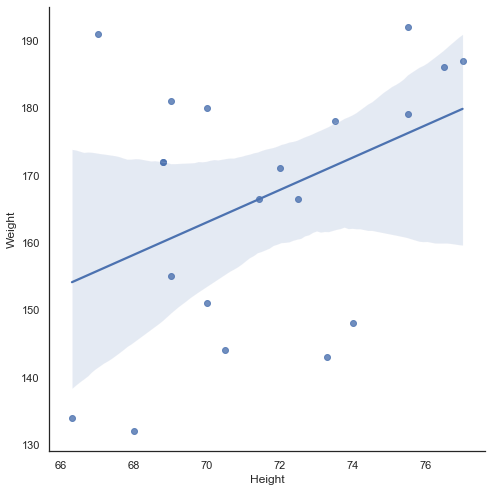

In [30]:
sns.lmplot(x= 'Height', y = 'Weight', data = brain_data[brain_data['Gender'] == 'Male'], size=7)